#Отчет по лабораторным работам №1-3 по ММО
Кудрявцев С.Д. ИУ5-22М

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler,  MinMaxScaler,  RobustScaler

Вывод датасета

In [ ]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.drop(['Customer Name', 'Customer ID', 'Order ID', 'Product ID', 'Row ID'], axis=1, inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Новый раздел

Просмотр попарных зависимостей категориальных переменных

In [ ]:
import plotly.express as px

df_cat = df[['Segment', 'Ship Mode', 'Category']]
list_cols = ['Segment', 'Ship Mode', 'Category']
fig = px.parallel_categories(df_cat, dimensions=list_cols)
fig.show()

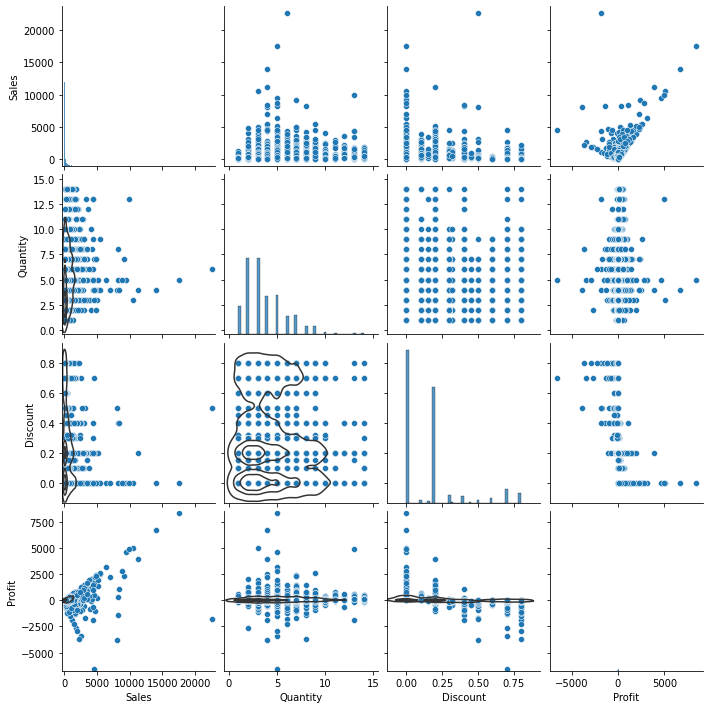

In [ ]:
numerical = ['Sales', 'Quantity', 'Discount', 'Profit']
g = sns.pairplot(df[numerical])
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [ ]:
fig = px.bar(df, x='Region', y='Sales', title="Распределение продаж по городам")
fig.show()

In [ ]:
fig = px.histogram(df, x='Profit', color='Region')
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   Country       9994 non-null   object 
 5   City          9994 non-null   object 
 6   State         9994 non-null   object 
 7   Postal Code   9994 non-null   int64  
 8   Region        9994 non-null   object 
 9   Category      9994 non-null   object 
 10  Sub-Category  9994 non-null   object 
 11  Product Name  9994 non-null   object 
 12  Sales         9994 non-null   float64
 13  Quantity      9994 non-null   int64  
 14  Discount      9994 non-null   float64
 15  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.2+ MB


Очистка от NULL

In [ ]:
df.dropna(inplace=True, axis=0)

In [ ]:
df.drop(['Order Date', 'Ship Date', 'Postal Code', 'Product Name'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [ ]:
df

,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Нормализация с использованием логарифмирования x+1
df['Sales_log'] = np.log1p(df['Sales'])
df

,Postal Code,Sales,Quantity,Discount,Profit,Order Date_1/1/2017,Order Date_1/10/2014,Order Date_1/10/2015,Order Date_1/10/2016,Order Date_1/11/2014,...,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,Discount_log,Sales_log
0,42420,261.9600,2,0.00,41.9136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,5.572002
1,42420,731.9400,3,0.00,219.5820,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,6.597064
2,90036,14.6200,2,0.00,6.8714,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,2.748552
3,33311,957.5775,5,0.45,-383.0310,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.371564,6.865450
4,33311,22.3680,2,0.20,2.5164,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.182322,3.151368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.182322,3.267590
9990,92627,91.9600,2,0.00,15.6332,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,4.532169
9991,92627,258.5760,2,0.20,19.3932,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.182322,5.559050
9992,92627,29.6000,4,0.00,13.3200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,3.421000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


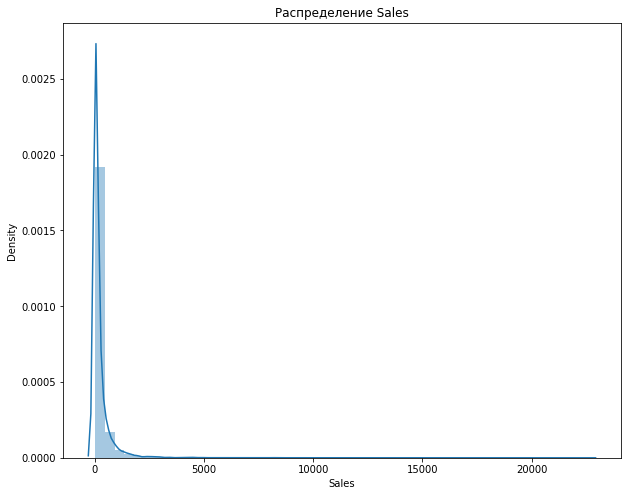

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Sales']
ax = sns.distplot(x)
ax.set_title("Распределение Sales")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


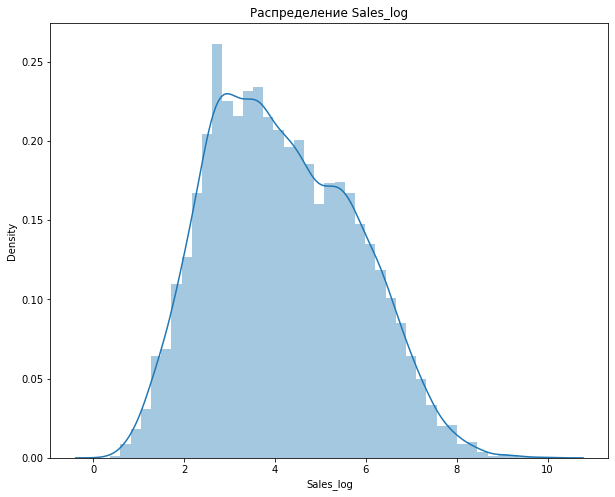

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['Sales_log']
ax = sns.distplot(x)
ax.set_title("Распределение Sales_log")
plt.show()

In [ ]:
# Масштабирование с RobustScaler
x_cols = df.columns
scaler = RobustScaler()
Robust_df = scaler.fit_transform(df)
Robust_df = pd.DataFrame(Robust_df, columns=[x_cols])
Robust_df

,Postal Code,Sales,Quantity,Discount,Profit,Order Date_1/1/2017,Order Date_1/10/2014,Order Date_1/10/2015,Order Date_1/10/2016,Order Date_1/11/2014,...,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,Discount_log,Sales_log
0,-0.209785,1.076871,-0.333333,-1.00,1.203069,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,0.636119
1,-0.209785,3.516298,0.000000,-1.00,7.632118,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,1.055236
2,0.503189,-0.206945,-0.333333,-1.00,-0.064957,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.518304
3,-0.346178,4.687468,0.666667,1.25,-14.173836,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.037957,1.164971
4,-0.346178,-0.166729,-0.333333,0.00,-0.222545,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.353605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,-0.348140,-0.151780,0.000000,0.00,-0.165141,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.306085
9990,0.541985,0.194488,-0.333333,-1.00,0.252095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,0.210963
9991,0.541985,1.059307,-0.333333,0.00,0.388153,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.630823
9992,0.541985,-0.129191,0.333333,-1.00,0.168390,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.243360


In [ ]:
# Масштабирование с Standard
x_cols = df.columns
scaler = StandardScaler()
Standard_df = scaler.fit_transform(df)
Standard_df = pd.DataFrame(Standard_df, columns=[x_cols])
Standard_df

,Postal Code,Sales,Quantity,Discount,Profit,Order Date_1/1/2017,Order Date_1/10/2014,Order Date_1/10/2015,Order Date_1/10/2016,Order Date_1/11/2014,...,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,Discount_log,Sales_log
0,-0.398302,0.051510,-0.804303,-0.756643,0.056593,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,-0.820818,0.890653
1,-0.398302,0.805633,-0.354865,-0.756643,0.815054,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,-0.820818,1.535462
2,1.086817,-0.345368,-0.804303,-0.756643,-0.093002,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,-0.820818,-0.885422
3,-0.682407,1.167688,0.544012,1.423149,-1.757484,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,1.500271,1.704289
4,-0.682407,-0.332935,-0.804303,0.212153,-0.111593,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,0.318111,-0.632033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,-0.686492,-0.328314,-0.354865,0.212153,-0.104821,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,0.318111,-0.558924
9990,1.167629,-0.221269,-0.804303,-0.756643,-0.055598,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,-0.820818,0.236552
9991,1.167629,0.046080,-0.804303,0.212153,-0.039546,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,0.318111,0.882506
9992,1.167629,-0.321331,0.094574,-0.756643,-0.065473,-0.031648,-0.014148,-0.010004,-0.017328,-0.010004,...,-0.03609,-0.022373,-0.022373,-0.022373,-0.022373,-0.014148,-0.026475,-0.026475,-0.820818,-0.462422


In [ ]:
# Масштабирование с MinMax
x_cols = df.columns
scaler = MinMaxScaler()
MinMax_df = scaler.fit_transform(df)
MinMax_df = pd.DataFrame(MinMax_df, columns=[x_cols])
MinMax_df

,Postal Code,Sales,Quantity,Discount,Profit,Order Date_1/1/2017,Order Date_1/10/2014,Order Date_1/10/2015,Order Date_1/10/2016,Order Date_1/11/2014,...,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service,Discount_log,Sales_log
0,0.421123,0.011552,0.076923,0.0000,0.442794,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.538775
1,0.421123,0.032313,0.153846,0.0000,0.454639,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.644889
2,0.905710,0.000626,0.076923,0.0000,0.440458,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.246493
3,0.328421,0.042280,0.307692,0.5625,0.414464,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632140,0.672672
4,0.328421,0.000968,0.076923,0.2500,0.440168,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310183,0.288193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.327088,0.001096,0.153846,0.2500,0.440273,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310183,0.300224
9990,0.932079,0.004043,0.076923,0.0000,0.441042,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.431132
9991,0.932079,0.011403,0.076923,0.2500,0.441293,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.310183,0.537434
9992,0.932079,0.001288,0.230769,0.0000,0.440888,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.316105


In [ ]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    ss.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()


# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary   

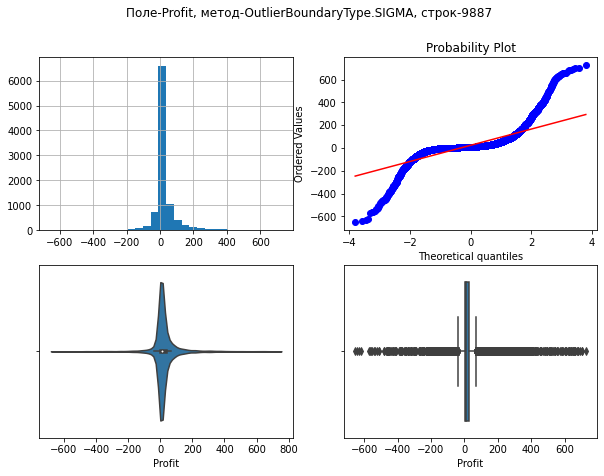

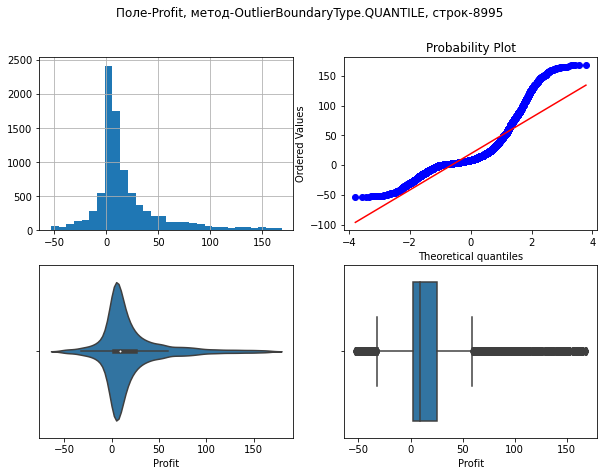

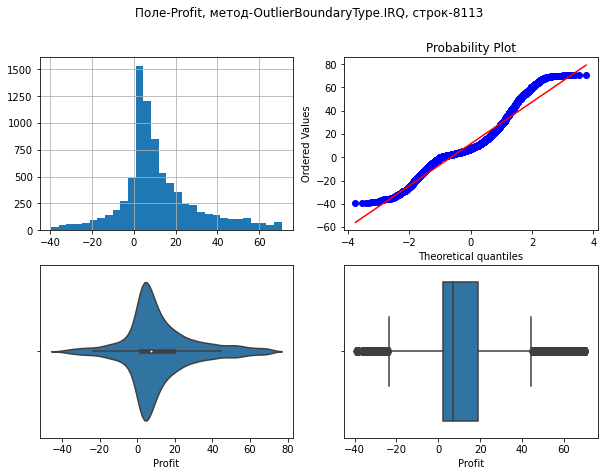

In [ ]:
for obt in OutlierBoundaryType:
  # Вычисление верхней и нижней границы
  lower_boundary, upper_boundary = get_outlier_boundaries(df, 'Profit', obt)
  # Флаги для удаления выбросов
  outliers_temp = np.where(df['Profit'] > upper_boundary, True, np.where(df['Profit'] < lower_boundary, True, False))
  # Удаление данных на основе флага
  data_trimmed = df.loc[~(outliers_temp), ]  
  title = 'Поле-{}, метод-{}, строк-{}'.format('Profit', obt, data_trimmed.shape[0])
  diagnostic_plots(data_trimmed, 'Profit', title)

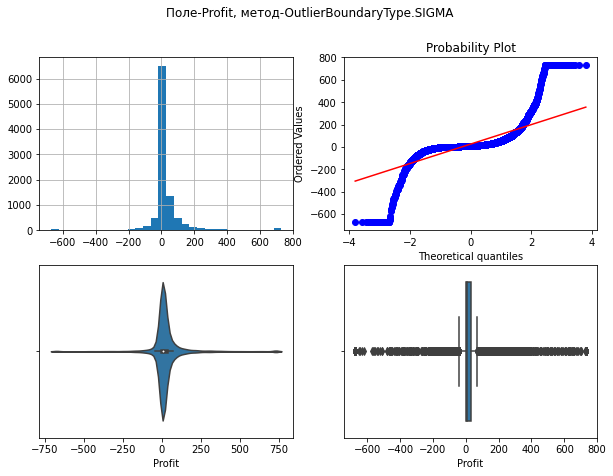

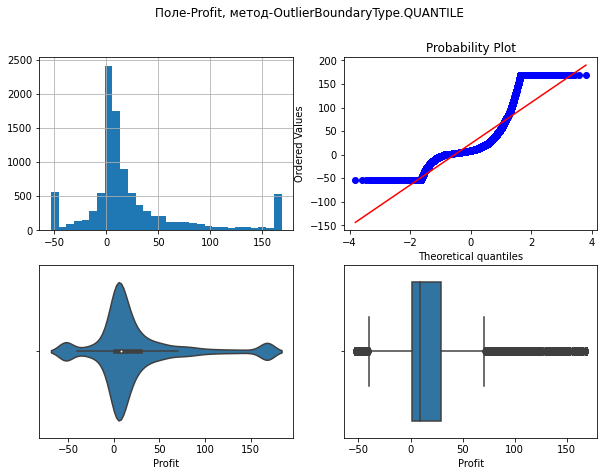

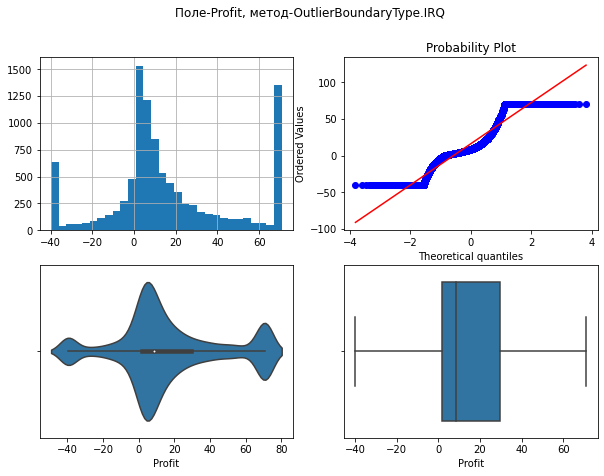

In [ ]:
for obt in OutlierBoundaryType:
  # Вычисление верхней и нижней границы
  lower_boundary, upper_boundary = get_outlier_boundaries(df, 'Profit', obt)
  # Изменение данных
  df['Profit'] = np.where(df['Profit'] > upper_boundary, upper_boundary, 
                            np.where(df['Profit'] < lower_boundary, lower_boundary, df['Profit']))
  title = 'Поле-{}, метод-{}'.format('Profit', obt)
  diagnostic_plots(df, 'Profit', title)

In [ ]:
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

In [ ]:
d = {'times': pd.date_range(start='2022-01-01', end='2022-01-04' , freq="30min")}
df_time = pd.DataFrame(data=d)
df_time['times'] = pd.to_datetime(df_time['times'])
df_time

,times
0,2022-01-01 00:00:00
1,2022-01-01 00:30:00
2,2022-01-01 01:00:00
3,2022-01-01 01:30:00
4,2022-01-01 02:00:00
...,...
140,2022-01-03 22:00:00
141,2022-01-03 22:30:00
142,2022-01-03 23:00:00
143,2022-01-03 23:30:00


In [ ]:
df_time['day'] = df_time['times'].dt.day
df_time['month'] = df_time['times'].dt.month
df_time['hour'] = df_time['times'].dt.hour
df_time['minute'] = df_time['times'].dt.minute
df_time['second'] = df_time['times'].dt.second
df_time['week'] = df_time['times'].dt.isocalendar().week
df_time['quarter'] = df_time['times'].dt.quarter
df_time['dayofweek'] = df_time['times'].dt.dayofweek
df_time['day_name'] = df_time['times'].dt.day_name()
df_time['is_holiday'] = df_time.apply(lambda x: 1 if x['times'].dayofweek in [5,6] else 0, axis=1)
df_time

,times,day,month,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,2022-01-01 00:00:00,1,1,0,0,0,52,1,5,Saturday,1
1,2022-01-01 00:30:00,1,1,0,30,0,52,1,5,Saturday,1
2,2022-01-01 01:00:00,1,1,1,0,0,52,1,5,Saturday,1
3,2022-01-01 01:30:00,1,1,1,30,0,52,1,5,Saturday,1
4,2022-01-01 02:00:00,1,1,2,0,0,52,1,5,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...
140,2022-01-03 22:00:00,3,1,22,0,0,1,1,0,Monday,0
141,2022-01-03 22:30:00,3,1,22,30,0,1,1,0,Monday,0
142,2022-01-03 23:00:00,3,1,23,0,0,1,1,0,Monday,0
143,2022-01-03 23:30:00,3,1,23,30,0,1,1,0,Monday,0


In [ ]:
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    df_time[f_cos] = df_time.apply(lambda x: round_code(x[f], p), axis=1)
    df_time[f_sin] = df_time.apply(lambda x: round_code(x[f], p, False), axis=1)
df_time  

,times,day,month,hour,minute,second,week,quarter,dayofweek,day_name,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2022-01-01 00:00:00,1,1,0,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
1,2022-01-01 00:30:00,1,1,0,30,0,52,1,5,Saturday,...,-1.0,5.665539e-16,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
2,2022-01-01 01:00:00,1,1,1,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
3,2022-01-01 01:30:00,1,1,1,30,0,52,1,5,Saturday,...,-1.0,5.665539e-16,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
4,2022-01-01 02:00:00,1,1,2,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2022-01-03 22:00:00,3,1,22,0,0,1,1,0,Monday,...,1.0,0.000000e+00,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
141,2022-01-03 22:30:00,3,1,22,30,0,1,1,0,Monday,...,-1.0,5.665539e-16,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
142,2022-01-03 23:00:00,3,1,23,0,0,1,1,0,Monday,...,1.0,0.000000e+00,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
143,2022-01-03 23:30:00,3,1,23,30,0,1,1,0,Monday,...,-1.0,5.665539e-16,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000


In [ ]:
# filtration

df_time.quarter.nunique()

1

In [ ]:
df_time

,times,day,month,hour,minute,second,week,quarter,dayofweek,day_name,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2022-01-01 00:00:00,1,1,0,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
1,2022-01-01 00:30:00,1,1,0,30,0,52,1,5,Saturday,...,-1.0,5.665539e-16,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
2,2022-01-01 01:00:00,1,1,1,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
3,2022-01-01 01:30:00,1,1,1,30,0,52,1,5,Saturday,...,-1.0,5.665539e-16,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
4,2022-01-01 02:00:00,1,1,2,0,0,52,1,5,Saturday,...,1.0,0.000000e+00,1.0,0.0,1.000000,6.432491e-16,6.123234e-17,1.0,-0.222521,-0.974928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2022-01-03 22:00:00,3,1,22,0,0,1,1,0,Monday,...,1.0,0.000000e+00,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
141,2022-01-03 22:30:00,3,1,22,30,0,1,1,0,Monday,...,-1.0,5.665539e-16,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
142,2022-01-03 23:00:00,3,1,23,0,0,1,1,0,Monday,...,1.0,0.000000e+00,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000
143,2022-01-03 23:30:00,3,1,23,30,0,1,1,0,Monday,...,-1.0,5.665539e-16,1.0,0.0,0.992709,1.205367e-01,6.123234e-17,1.0,1.000000,0.000000


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=False,
           cv=2)

efs1 = efs1.fit(df.drop(['Profit'], axis=1), df['Profit'], custom_feature_names=list(df.columns)[:-1])

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Выходные данные были обрезаны до нескольких последних строк (5000).
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0} is not supported".format(y_type))
ValueError: continuous is not supported

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_

KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

e_lr1 = LinearRegression()
e_lr1.fit(df.drop(['Profit'], axis=1), df['Profit'])

LinearRegression()

In [ ]:
sel_e_ls1 = SelectFromModel(e_lr1)
sel_e_ls1.fit(df.drop(['Profit'], axis=1), df['Profit'])
list(zip(list(df.columns)[1:], sel_e_ls1.get_support()))

[('Quantity', False),
 ('Discount', False),
 ('Profit', True),
 ('Ship Mode_First Class', False),
 ('Ship Mode_Same Day', False),
 ('Ship Mode_Second Class', False),
 ('Ship Mode_Standard Class', False),
 ('Segment_Consumer', False),
 ('Segment_Corporate', False),
 ('Segment_Home Office', False),
 ('Country_United States', False),
 ('City_Aberdeen', False),
 ('City_Abilene', True),
 ('City_Akron', False),
 ('City_Albuquerque', False),
 ('City_Alexandria', True),
 ('City_Allen', False),
 ('City_Allentown', True),
 ('City_Altoona', True),
 ('City_Amarillo', True),
 ('City_Anaheim', False),
 ('City_Andover', False),
 ('City_Ann Arbor', True),
 ('City_Antioch', True),
 ('City_Apopka', True),
 ('City_Apple Valley', False),
 ('City_Appleton', True),
 ('City_Arlington', False),
 ('City_Arlington Heights', False),
 ('City_Arvada', False),
 ('City_Asheville', True),
 ('City_Athens', False),
 ('City_Atlanta', False),
 ('City_Atlantic City', False),
 ('City_Auburn', False),
 ('City_Aurora', False